<font size=7 face="courier">Electrophysiology Source Code


    
**To Do**
* <font color="green">Make rasterplot</font>
* <font color="red">(Optional) show variability in number of active units in the population over time<font color="red">
* <font color="green">Plot average firing rate distribution over all units</font>
* <font color="green">Plot ISI distribution for 2-3 example units (to show differences in distribution shape)</font>
* <font color="red">(optionally) compute CV score for distribution to quantify difference</font>
* <font color="green">Plot spike time latency distribution for pair of units (choose example with narrow distribution with nonzero mean). Ask what this distribution means for the interaction between the two units.</font>
* <font color="green">Compute correlation matrix and plot results as distribution</font>
* <font color="green">Compute STTC matrix and plot results as distribution</font>

# Set Up Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import braingeneers
from braingeneers.analysis.analysis import SpikeData
import scipy.io as sio
import scipy
#!pip install powerlaw

In [2]:
def mat_to_spikeData(mat_path):

    mat = sio.loadmat(mat_path)
    units = [i[0][0]*1e3 for i in mat['spike_times']]
    sd = SpikeData(units)
    return sd

In [20]:
#sd = mat_to_spikeData('Spike_Raster.mat')
sd = mat_to_spikeData('data/Spike_Raster_Diazepam.mat')
# All spikeData is in ms

# Make Raster Plot

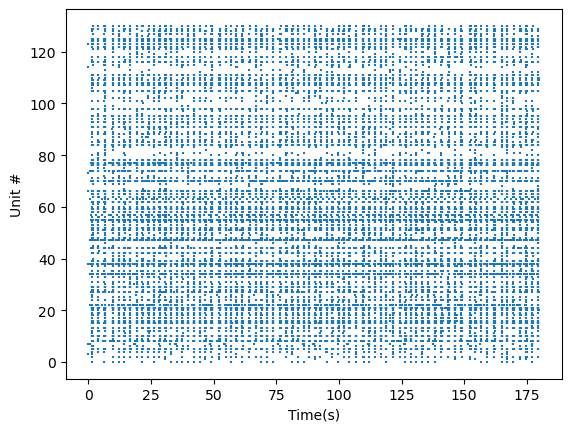

In [4]:
# Raster
# Get coordinates for raster
idces, times = sd.idces_times()

fig, ax = plt.subplots()

ax.scatter(times/1000,idces,marker='|',s=1)


ax.set_xlabel("Time(s)")
ax.set_ylabel('Unit #')

plt.show()

# Plot Average Firing Rate over All Units

In [5]:
from scipy.ndimage import gaussian_filter1d

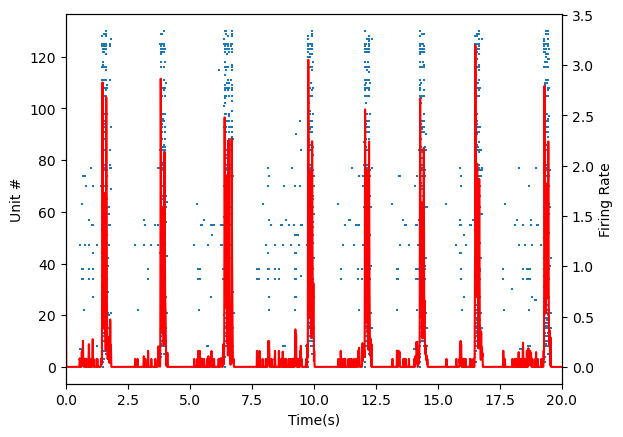

In [6]:
# Zoomed Raster and pop rate
# Get coordinates for raster
idces, times = sd.idces_times()

# Get population rate for everything
pop_rate = sd.binned(bin_size=1)# in ms
# Lets smooth this to make it neater
sigma = 5
pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float),sigma=sigma) 
t = np.linspace(0,sd.length,pop_rate.shape[0])/1000

fig, ax = plt.subplots()

ax.scatter(times/1000,idces,marker='|',s=1)
ax2 = ax.twinx()
ax2.plot(t,pop_rate_smooth,c='r')

ax.set_xlim(0,20)
ax.set_xlabel("Time(s)")
ax.set_ylabel('Unit #')
ax2.set_ylabel('Firing Rate')
plt.show()

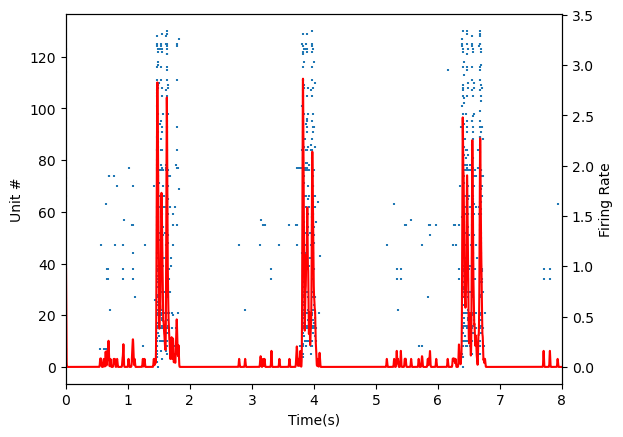

In [7]:
# Zoomed Raster and pop rate
# Get coordinates for raster
idces, times = sd.idces_times()

# Get population rate for everything
pop_rate = sd.binned(bin_size=1)# in ms
# Lets smooth this to make it neater
sigma = 5
pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float),sigma=sigma) 
t = np.linspace(0,sd.length,pop_rate.shape[0])/1000

fig, ax = plt.subplots()

ax.scatter(times/1000,idces,marker='|',s=1)
ax2 = ax.twinx()
ax2.plot(t,pop_rate_smooth,c='r')

ax.set_xlim(0,8)
ax.set_xlabel("Time(s)")
ax.set_ylabel('Unit #')
ax2.set_ylabel('Firing Rate')
plt.show()

# Calculate firing rate

In [15]:
spike_tot = 0
for train in  data_diazepam.train:
    spike_tot += len(train)
spike_tot/len(data_diazepam.train)/data_diazepam.length*1000

In [16]:
spike_tot

20971

0.8894057855814546

# Interspike-intervals of 2 select neurons

In [8]:
# Interspike-intervals of 2 select neurons
isis = sd.interspike_intervals()
# print(isis[0])
# Plot the first


In [9]:
isis2=[]
for i in range(len(isis)):
    isi=isis[i]
    isis2 = isis2 + isi[isi<100].tolist() 

Text(0, 0.5, 'ISI count')

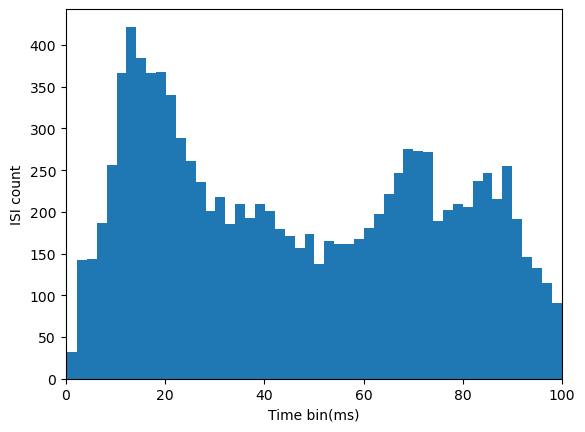

In [10]:
# print(isis[0])
# Plot the first
n_bins = 50

plt.xlim(0,100)
plt.hist(isis2, bins=n_bins)
#plt.hist(isis[0],bins=n_bins)
#plt.hist(isis[2],bins=n_bins)
plt.xlabel('Time bin(ms)')
plt.ylabel('ISI count')

# <font color="red">CV Score

In [14]:
np.std(isis2)/np.mean(isis2)

0.5999328469175627

# Plot spike time latency distribution for pair of units 

In [ ]:
neuron_ind = 25
n_bins = 30



latencies = sd.latencies(sd.train[neuron_ind],window_ms=500)

# Plot latency dist for first 5 neurons
#for latency in latencies[31]:
#    plt.hist(latency, n_bins, alpha=.5)

plt.hist(latencies[35], n_bins, alpha=.5)
plt.xlabel('Lag time')
plt.ylabel('Count')
plt.show()
    
    

# Compute Correlation Matrix

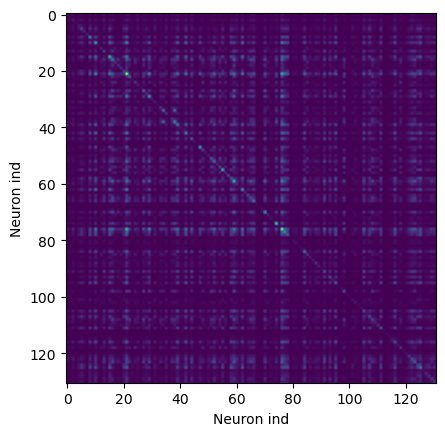

In [11]:
# Correlation
corr = np.zeros((sd.N,sd.N)) #inds by inds

dense_raster = sd.raster(bin_size=1) # in ms
# Blur it
sigma = 5
dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 

# Correlation at 0 lag
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        corr[i,j] = scipy.signal.correlate(dense_raster[i],dense_raster[j],'valid')

plt.imshow(corr)
plt.xlabel("Neuron ind")
plt.ylabel("Neuron ind")
plt.show() 
        

In [ ]:
# Correlation
corr = np.zeros((sd.N,sd.N)) #inds by inds

dense_raster = sd.raster(bin_size=5) # in ms
# Blur it
sigma = 5
dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 

# Compute lag times
lag_mat = np.zeros((sd.N,sd.N))

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        correlation = scipy.signal.correlate(dense_raster[i], dense_raster[j], mode="same")
        lags = scipy.signal.correlation_lags(dense_raster[i].size, dense_raster[j].size, mode="same")
        lag = lags[np.argmax(correlation)]
        lag_mat[i,j] = lag
        print(i,j)

plt.imshow(lag_mat)
plt.xlabel("Neuron ind")
plt.ylabel("Neuron ind")
plt.show() 


In [ ]:
dense_raster[0].shape

# Compute Spike Time Tiling

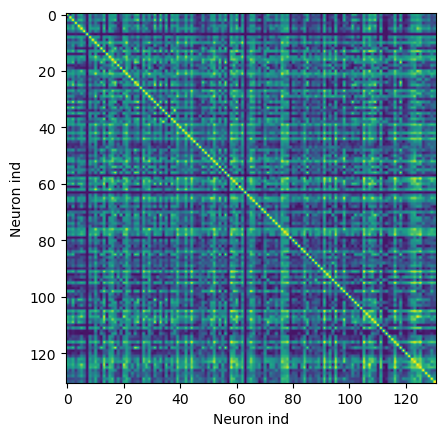

In [12]:
# Compute Spike time tiling
delt = 20
stts = sd.spike_time_tilings(delt)

# Show matrix as heatmap
plt.imshow(stts)
plt.xlabel("Neuron ind")
plt.ylabel("Neuron ind")
plt.show()

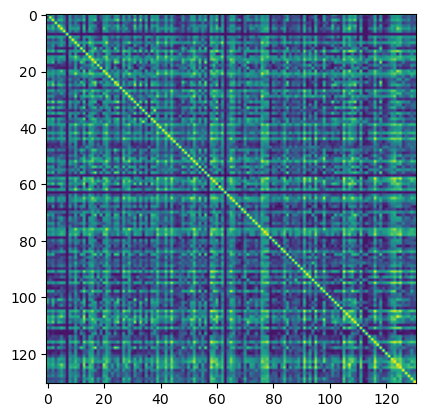

In [13]:
stts = sd.spike_time_tilings(delt)
plt.imshow(stts)
plt.show()